<a href="https://colab.research.google.com/github/CristaldoWeint/https-github.com-CristaldoWeint-Fundamentos-de-M-todos-Anal-ticos-Predictivos/blob/main/FMAP_Clase3_Actividad_Propuesta__CRISTALDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

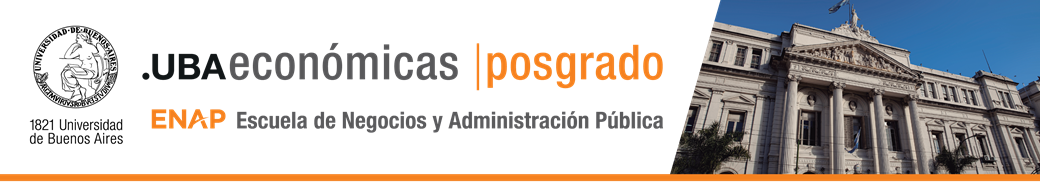

MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS (VIRTUAL)
# Fundamentos de Métodos Analíticos Predictivos (FMAP)



**Clase 3: Actividad Optativa**

El set de datos Default, original del paquete ISLR de R, corresponde a datos de cesación de pago de clientes de tarjetas de crédito.
Las variables registradas son: default (yes o no), student (yes o no), balance (balance mensual de la tarjeta) e income (ingreso anual).
Se puede acceder en Python a través de statsmodels.datasets.get_rdataset,

Nota: listado de todos los set de datos disponibles en [Rdatasets](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)

In [1]:
#Importamos las librerías necesarias para poder leer el archivo
import numpy as np
import pandas as pd
import statsmodels.api as sm  #Nos permite acceder al conjunto de datos

In [2]:
Default = sm.datasets.get_rdataset("Default", "ISLR")

In [3]:
#Con la extensión .data accedemos a los datos y le asignamos por ejemplo el nombre datos
datos = Default.data

In [4]:
# En pandas, el tipo "object" hace referencia a strings
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [5]:
 #Para obterner la información sobre el conjunto de datos Default
print(Default.__doc__)

.. container::

   .. container::

      ======= ===============
      Default R Documentation
      ======= ===============

      .. rubric:: Credit Card Default Data
         :name: credit-card-default-data

      .. rubric:: Description
         :name: description

      A simulated data set containing information on ten thousand
      customers. The aim here is to predict which customers will default
      on their credit card debt.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         Default

      .. rubric:: Format
         :name: format

      A data frame with 10000 observations on the following 4 variables.

      ``default``
         A factor with levels ``No`` and ``Yes`` indicating whether the
         customer defaulted on their debt

      ``student``
         A factor with levels ``No`` and ``Yes`` indicating whether the
         customer is a student

      ``balance``
         The average balance that the customer has remaining on their
       

In [6]:
# Para obtener la información de la dimensión de la base( número de filas y columnas)

datos.shape

(10000, 4)

In [7]:
# Para ver si hay datos faltantes por variable

datos.isna().sum().sort_values()

,0
default,0
student,0
balance,0
income,0


In [8]:
#Inspeccionamos los primeros 5 filas
datos.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [9]:
# Para obtener los valores únicos del campo categórico, es decir los niveles de la variable clasificadora
pd.unique(datos['default'])

array(['No', 'Yes'], dtype=object)

Hacemos un análisis descriptivo teniendo en cuenta que la variable de interéas a predecir es default y las  variables predictoras , balance e income

In [10]:
#Análisis descriptivo de las variables numéricas
datos.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


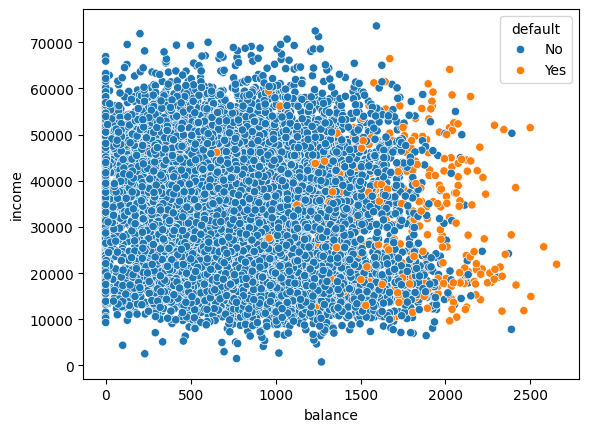

In [11]:
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para graficar
#Graficamos en la escala original
sns.scatterplot(x="balance", y="income", hue="default", data=datos)

# Mostrar el gráfico
plt.show()

A partir de acá continué con la actividad pedida.

# Solucion Actividad

>Consigna: En esta actividad se propone replicar lo realizado en el Ejemplo 1.Clase 3, considerando como variables predictoras balance e income, y como variable respuesta default

## Para ello se procede a

 1) Estandarizar los datos de Balance e Income

 2) Convertir el valour de default en no = 0, si =1

In [12]:
import numpy as np #nos permitirá realizar operaciones numéricas con matrices, vectores y escalares
import pandas as pd #para manipular datos que esten en un formato de tablas
from sklearn.preprocessing import StandardScaler #para escalar variables
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para graficar
from sklearn.neighbors import KNeighborsClassifier #para clasificar con KNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.model_selection import train_test_split #para seleccionarel conjunto de prueba y entrenamiento
from sklearn.metrics import precision_score,recall_score, accuracy_score,f1_score,classification_report, confusion_matrix # para obtener la matriz de confusion y métricas derivadas  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.model_selection import cross_val_score #para hacer cross validation

In [16]:
scaler = StandardScaler()
Datosesc = scaler.fit_transform(datos[['balance', 'income']])
Datosesc = pd.DataFrame(Datosesc, columns=['balance_s', 'income_s'])



In [17]:
Datosesc['default'] = datos['default'].apply(lambda x: 0 if x == 'No' else 1)

In [18]:
Datosesc.head()

,balance_s,income_s,default
0,-0.218835,0.813187,0
1,-0.037616,-1.605496,0
2,0.492410,-0.131212,0
3,-0.632893,0.164031,0
4,-0.102791,0.370915,0


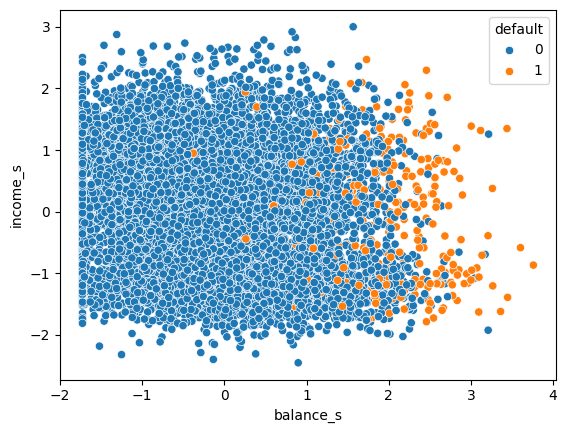

In [19]:
#Graficamos con los datos escalados
sns.scatterplot(x="balance_s", y="income_s", hue="default", data=Datosesc)

# Mostrar el gráfico
plt.show()

## Separar en conjunto de entrenamiento y prueba

In [20]:
# Separar en conjunto de entrenamiento y prueba
X = Datosesc[['balance_s', 'income_s']]  # variables predictoras
y = Datosesc['default']     # variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)
# imprimimos la longitud de cada conjunto
print("Datos de entrenamiento:", len(X_train))
print("Datos de prueba:", len(X_test))

Datos de entrenamiento: 7000
Datos de prueba: 3000


In [21]:
X.head(4)

,balance_s,income_s
0,-0.218835,0.813187
1,-0.037616,-1.605496
2,0.492410,-0.131212
3,-0.632893,0.164031


In [22]:
X_train.head(4)

,balance_s,income_s
2781,0.659631,-1.371914
8045,-0.460672,-0.036048
3546,-1.727085,1.367836
4920,-1.727085,-1.268400


In [23]:
#Datos por categoría
tabla = y.value_counts()
print(tabla)

default
0    9667
1     333
Name: count, dtype: int64


In [24]:
#Datos por categoría en el conjunto de entrenamiento
y_train.value_counts()

,count
default,
0,6774
1,226


In [25]:
#Datos por categoría en el conjunto de testeo
y_test.value_counts()

,count
default,
0,2893
1,107


## Trajo con la función KNeighborsClassifier de la librería scikit-learn

In [26]:
# Vamos a trabajar con la función KNeighborsClassifier de la librería scikit-learn
# Creamos el modelo KNN con k=3
knn3= KNeighborsClassifier(n_neighbors=3)

# Entrenamos el modelo
knn3.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [27]:
# Realizamos predicciones sobre el conjunto de prueba
y_pred = knn3.predict(X_test)

In [28]:
# Crear dataframe con valores observados y predichos
df = pd.DataFrame({'Observado': y_test, 'Predicho': y_pred})
print(df)

      Observado  Predicho
9595          0         0
4687          0         0
1963          0         0
4450          0         0
9238          0         0
...         ...       ...
5740          0         0
1615          0         0
4800          0         0
2664          0         0
7066          0         0

[3000 rows x 2 columns]


## Evaluación del modelo

In [29]:
#Evaluamos el algoritmo de clasificación o el desempeño del modelo
#Matriz de confusión
confusion_matrix(y_test,y_pred) # pasamos como argumento de la matriz de confusión los valores  y_test y los predichos por el modelo

array([[2871,   22],
       [  75,   32]])

In [30]:
#Precisión

precision_score (y_test,y_pred) # pasamos como argumento de la matriz de confusión los valores  y_test y los predichos por el modelo


0.5925925925925926

In [31]:
  #Recall

  recall_score (y_test,y_pred)# pasamos como argumento de la matriz de confusión los valores  y_test y los predichos por el modelo

0.29906542056074764

In [32]:
#Accuracy

accuracy_score (y_test,y_pred)# pasamos como argumento de la matriz de confusión los valores  y_test y los predichos por el modelo

0.9676666666666667

In [33]:
#F1-Score

f1_score (y_test,y_pred)# pasamos como argumento de la matriz de confusión los valores  y_test y los predichos por el modelo

0.39751552795031053

### Podemos usar también classification_report que nos da un resumen de las 4 métricas.


La diferencia es que calcula para precisión, recall y f1 score, las probabilidades sobre cada una de las clases.


Para accuracy y f1_score da también otras dos opciones.

macro avg: le da el mismo peso a cada clase

weighted avg: pondera por el peso que tiene cada clase




In [34]:
#Podemos usar también classification_report
# Pasamos como argumento de la matriz de confusión los valores  y_test y los predichos por el modelo
print(classification_report(y_test,y_pred)) #Hacemos print para visualizar la informacion ordenada

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2893
           1       0.59      0.30      0.40       107

    accuracy                           0.97      3000
   macro avg       0.78      0.65      0.69      3000
weighted avg       0.96      0.97      0.96      3000



## Cross Validation

### Para Accuracy

In [35]:

score = knn3.score(X_test, y_test)

print("Metrica del modelo", score) #por default es accuracy

scores = cross_val_score(knn3, X, y, cv=5) #CV=5 es el default tb y la métrica es accuracy
scores

print("Metricas cross_validation", scores)


print("Media de cross_validation", scores.mean())
#Media y desviación estandar
print("%0.2f accuracy con una desviación standard deviation de %0.2f" % (scores.mean(), scores.std()))


Metrica del modelo 0.9676666666666667
Metricas cross_validation [0.9695 0.9675 0.965  0.967  0.965 ]
Media de cross_validation 0.9668000000000001
0.97 accuracy con una desviación standard deviation de 0.00


### Para F1-score

In [36]:
from sklearn import metrics
scores2 = cross_val_score(knn3, X, y, cv=5, scoring='f1_macro')
print("F1 cross_validation",scores2)
print("Media de cross_validation (F1)", scores2.mean())


F1 cross_validation [0.7071187  0.69348225 0.66693312 0.71183821 0.68926453]
Media de cross_validation (F1) 0.6937273627833971


### Para Precisión

In [37]:

scores3 = cross_val_score(knn3, X, y, cv=5, scoring='precision_macro')
print("Precision cross_validation",scores3)
print("Media de cross_validation (precision)", scores3.mean())




Precision cross_validation [0.76951282 0.74457226 0.71945617 0.74438375 0.72341761]
Media de cross_validation (precision) 0.7402685196935987


## Clasificar con KNN para valores de k=3, hasta k=10.

Para cada uno hacemos CV y luego comparamos los resultados obtenidos

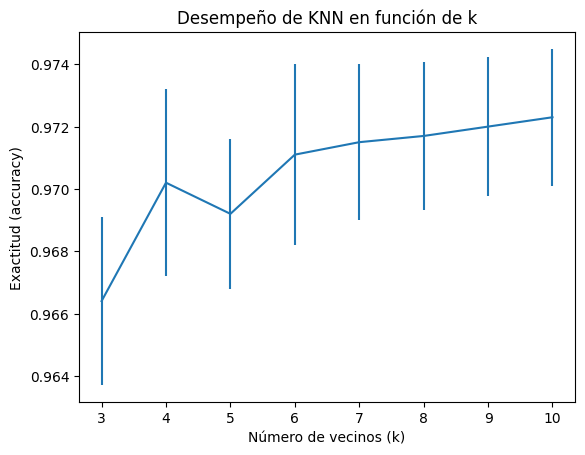

In [38]:
# Creamos una lista de valores de k para KNN
k_list = list(range(3, 11))

# Creamos 2 listas "vacías" para guardar los resultados de rendimiento y sus desviaciones estándar
accuracy = []
std_dev = []

# Para aplicar KNN para los distintos valores de K hacemos un for
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    accuracy.append(scores.mean())
    std_dev.append(scores.std())

# Graficamos los resultados del desmpeño
plt.errorbar(k_list, accuracy, yerr=std_dev)
plt.title('Desempeño de KNN en función de k')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Exactitud (accuracy)')
plt.show()

Respuesta:

> Del analisis realizado se obtuvo que el modelo tiene un 96,77% de precision, lo que indica  que el modelo KNN tiene una alta precisión y un rendimiento muy consistente en la validación cruzada [0.9695, 0.9675, 0.965, 0.967, 0.965] .